# **Importing Libraries**

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [4]:
!pip install -q xgboost

In [5]:
import xgboost as xgb
from xgboost import XGBClassifier

In [72]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

In [6]:
!pip install -q catboost

In [7]:
from catboost import CatBoostClassifier

In [8]:
!pip install -q lightgbm

In [9]:
from lightgbm import LGBMClassifier

# **Dataset**

In [10]:
data_set = pd.read_csv('genres_v2.csv', low_memory = False)

# **Exploratory Data Analysis**

In [11]:
df_org = data_set.copy()

In [12]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [13]:
df_org.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
36845,0.596,0.883,6,-6.705,0,0.0425,0.000310,0.738000,0.0994,0.0349,...,4zZqVnTVRg3yr4LljJ5u0A,spotify:track:4zZqVnTVRg3yr4LljJ5u0A,https://api.spotify.com/v1/tracks/4zZqVnTVRg3y...,https://api.spotify.com/v1/audio-analysis/4zZq...,353363,4,dnb,NaN,15444.0,Liquid Drum & Bass
4162,0.694,0.674,2,-7.318,0,0.0274,0.000361,0.013800,0.1150,0.4900,...,1R7BAa04o45NbnelHT807B,spotify:track:1R7BAa04o45NbnelHT807B,https://api.spotify.com/v1/tracks/1R7BAa04o45N...,https://api.spotify.com/v1/audio-analysis/1R7B...,155096,4,Dark Trap,Hot Spot,NaN,NaN
31761,0.637,0.971,7,-5.261,1,0.0583,0.000082,0.812000,0.1640,0.3140,...,76jZG1equEZ41PddqGpgx0,spotify:track:76jZG1equEZ41PddqGpgx0,https://api.spotify.com/v1/tracks/76jZG1equEZ4...,https://api.spotify.com/v1/audio-analysis/76jZ...,463448,4,psytrance,NaN,10325.0,Psytrance New Releases 2020
8872,0.916,0.449,0,-10.668,1,0.1820,0.695000,0.006260,0.1550,0.6200,...,0sV2q9kgdJJePMAsnVS8o5,spotify:track:0sV2q9kgdJJePMAsnVS8o5,https://api.spotify.com/v1/tracks/0sV2q9kgdJJe...,https://api.spotify.com/v1/audio-analysis/0sV2...,120905,4,Underground Rap,Scared of Death,NaN,NaN
26027,0.709,0.706,7,-14.306,1,0.0511,0.178000,0.898000,0.0888,0.0500,...,0fSWx7tvMiwvmFCSBVmkqA,spotify:track:0fSWx7tvMiwvmFCSBVmkqA,https://api.spotify.com/v1/tracks/0fSWx7tvMiwv...,https://api.spotify.com/v1/audio-analysis/0fSW...,395480,4,techno,NaN,4551.0,|DARK|HARD|TECHNO
5264,0.836,0.624,4,-6.750,0,0.1840,0.187000,0.000000,0.1380,0.7000,...,1gVCEnryJhkdQcuC0Kbvor,spotify:track:1gVCEnryJhkdQcuC0Kbvor,https://api.spotify.com/v1/tracks/1gVCEnryJhkd...,https://api.spotify.com/v1/audio-analysis/1gVC...,139890,4,Underground Rap,FIND MY WAY,NaN,NaN
8792,0.835,0.701,6,-4.070,1,0.0664,0.079800,0.000000,0.0879,0.6360,...,6cpgeEKp4wXsTQ5xk3gIwC,spotify:track:6cpgeEKp4wXsTQ5xk3gIwC,https://api.spotify.com/v1/tracks/6cpgeEKp4wXs...,https://api.spotify.com/v1/audio-analysis/6cpg...,141573,4,Underground Rap,Crown Me,NaN,NaN
9302,0.697,0.493,5,-7.989,0,0.2340,0.317000,0.000000,0.1080,0.2500,...,6ChdMi0GZVAM6ENMwNvyjk,spotify:track:6ChdMi0GZVAM6ENMwNvyjk,https://api.spotify.com/v1/tracks/6ChdMi0GZVAM...,https://api.spotify.com/v1/audio-analysis/6Chd...,187089,4,Underground Rap,You the One,NaN,NaN
32963,0.635,0.940,7,-7.218,1,0.0470,0.004750,0.834000,0.8780,0.4180,...,7rgXC5dEAq4akPnr3YoLsb,spotify:track:7rgXC5dEAq4akPnr3YoLsb,https://api.spotify.com/v1/tracks/7rgXC5dEAq4a...,https://api.spotify.com/v1/audio-analysis/7rgX...,405983,4,psytrance,NaN,11545.0,Best Psytrance 2020
19370,0.763,0.516,3,-9.267,1,0.1150,0.054200,0.000689,0.1620,0.3630,...,5zrZHMklhOXABpnBl0EMBN,spotify:track:5zrZHMklhOXABpnBl0EMBN,https://api.spotify.com/v1/tracks/5zrZHMklhOXA...,https://api.spotify.com/v1/audio-analysis/5zrZ...,302347,4,Hiphop,Novacane,NaN,NaN


In [14]:
df = df_org.drop(['id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], axis = 1)

In [15]:
df.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre
35116,0.558,0.919,1,-1.948,1,0.0426,0.006510,0.789000,0.1960,0.8390,150.049,audio_features,158400,4,trap
37545,0.409,0.924,1,-2.645,1,0.0484,0.002330,0.060000,0.0989,0.1940,173.999,audio_features,181724,4,dnb
33891,0.576,0.976,1,-1.935,1,0.0462,0.000213,0.012500,0.3480,0.1910,140.021,audio_features,195434,4,trap
8924,0.804,0.456,1,-5.356,1,0.1660,0.050700,0.000000,0.1610,0.1930,147.989,audio_features,188293,4,Underground Rap
23490,0.486,0.819,10,-8.357,0,0.0966,0.042800,0.695000,0.1100,0.0719,127.979,audio_features,356267,4,techhouse
22635,0.867,0.658,9,-7.634,1,0.0676,0.005410,0.010300,0.2280,0.7170,124.027,audio_features,406692,4,techhouse
36350,0.627,0.931,4,-0.755,0,0.3040,0.003160,0.723000,0.1380,0.2010,144.990,audio_features,275582,4,trap
31947,0.641,0.969,7,-6.963,1,0.0686,0.000607,0.776000,0.6640,0.0451,140.019,audio_features,459429,4,psytrance
17318,0.736,0.449,1,-11.462,0,0.4250,0.330000,0.000162,0.0898,0.3260,160.252,audio_features,219080,4,RnB
28755,0.531,0.963,3,-5.066,0,0.0718,0.089200,0.016200,0.1160,0.0796,129.968,audio_features,260000,4,trance


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  duration_ms       42305 non-null  int64  
 13  time_signature    42305 non-null  int64  
 14  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 4.8+ MB


In [17]:
df['type'].value_counts()

type
audio_features    42305
Name: count, dtype: int64

In [18]:
df = df.drop('type', axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 4.5+ MB


In [20]:
int_columns = df.select_dtypes('int').columns
df[int_columns] = df[int_columns].astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  float64
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  float64
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  float64
 12  time_signature    42305 non-null  float64
 13  genre             42305 non-null  object 
dtypes: float64(13), object(1)
memory usage: 4.5+ MB


In [22]:
numeric_columns = df.select_dtypes(include = 'number').columns
n_cols = 5
n_rows = int(np.ceil(len(numeric_columns)/n_cols))
n_rows

3

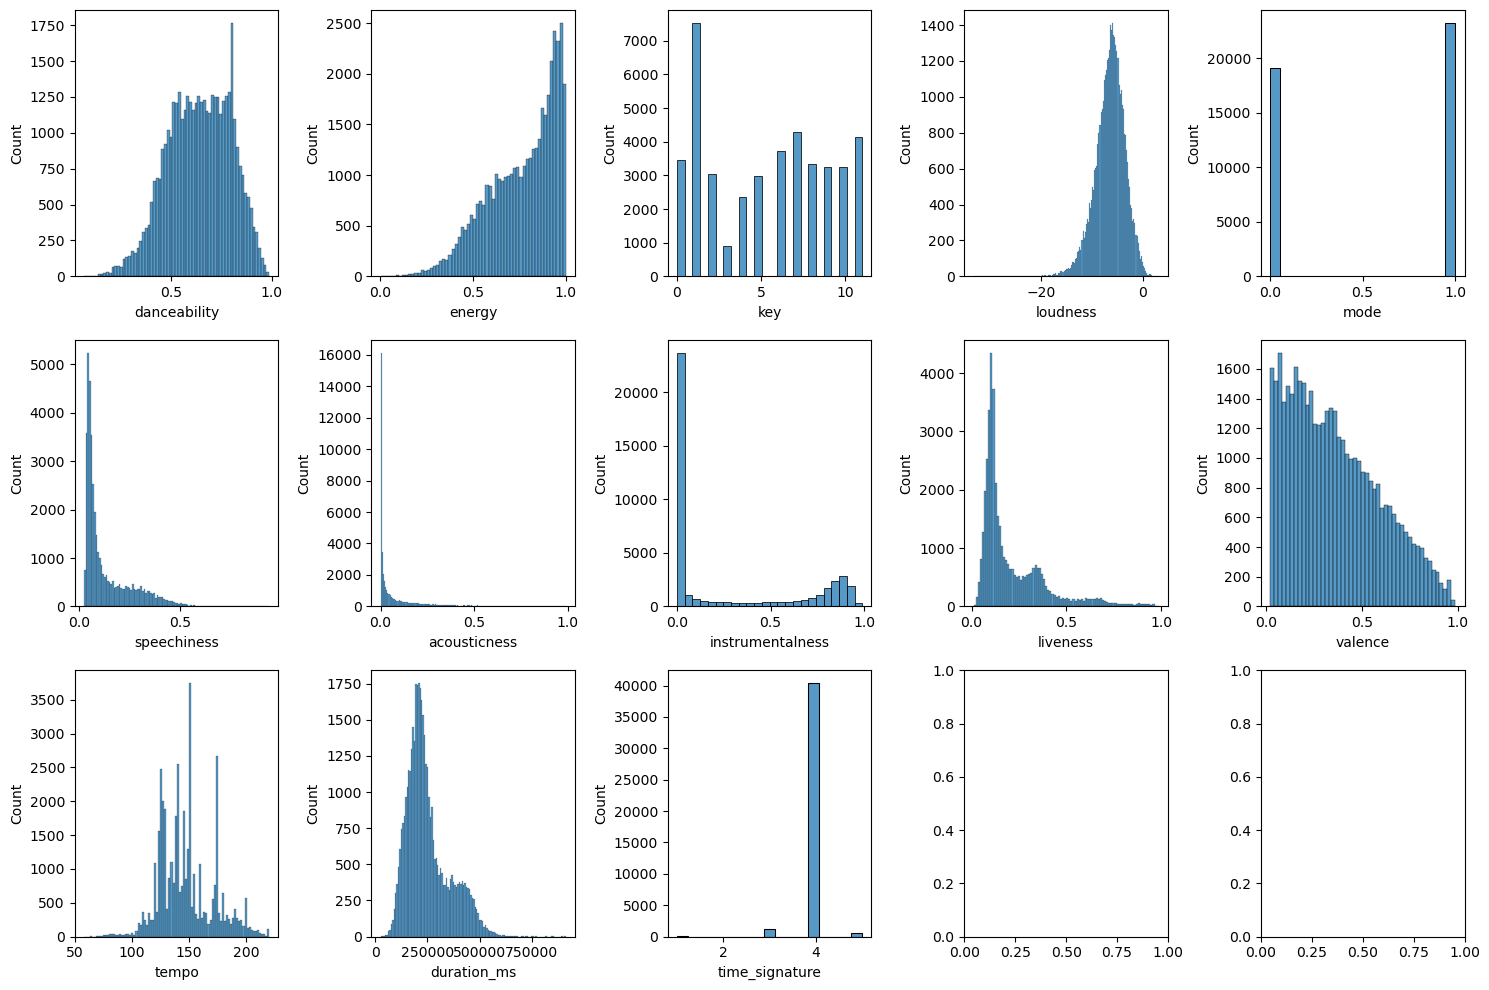

In [23]:
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15,10))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax = axes[i])
plt.tight_layout()
plt.show()

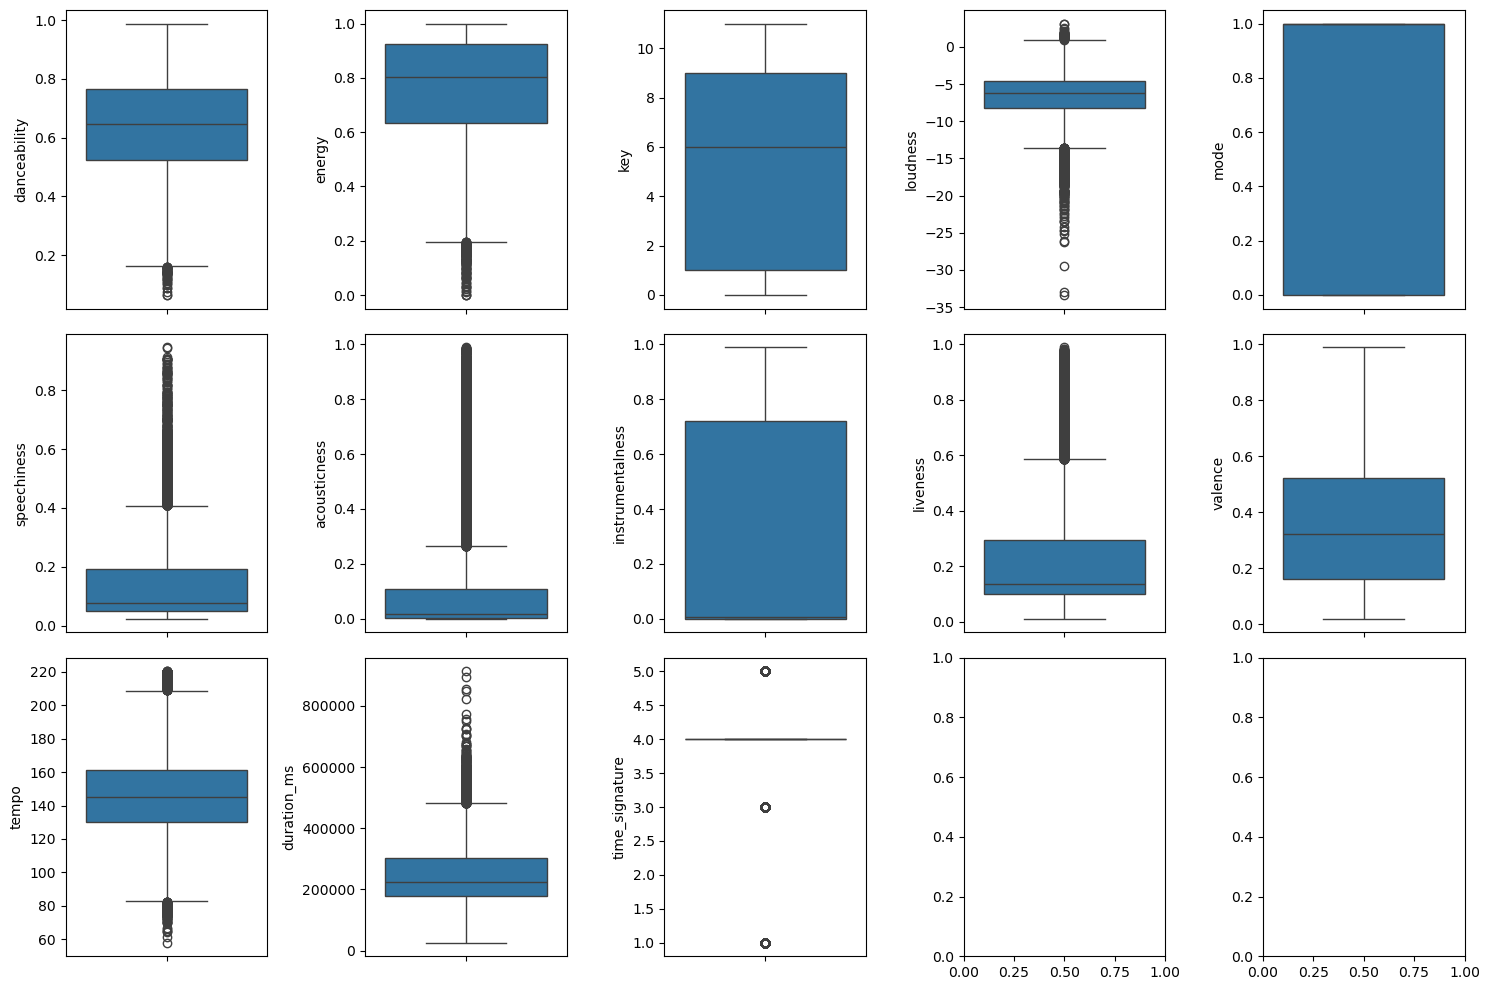

In [24]:
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15,10))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.boxplot(df[col], ax = axes[i])
plt.tight_layout()
plt.show()

# **Label Encoding of the Target Variable**

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

In [26]:
df[['genre', 'genre_encoded']].sample(20)

,genre,genre_encoded
17113,RnB,5
32046,psytrance,10
25068,techno,12
3051,Dark Trap,0
15387,Rap,4
29104,trance,13
5735,Underground Rap,7
3036,Dark Trap,0
38612,dnb,8
26539,techno,12


In [27]:
df = df.sample(4000)

# **Train Test Split**

In [28]:
X = df.drop(['genre', 'genre_encoded'], axis = 1)
y = df['genre_encoded']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200, 13), (800, 13), (3200,), (800,))

In [31]:
y.value_counts()

genre_encoded
7     552
0     448
2     303
8     292
10    287
12    279
9     277
14    276
11    274
13    268
5     201
6     168
1     165
4     163
3      47
Name: count, dtype: int64

In [32]:
X_train.sample(20)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
9724,0.854,0.704,8.0,-4.222,1.0,0.4200,0.086500,0.000000,0.2490,0.7930,184.446,257427.0,4.0
4041,0.503,0.788,4.0,-5.414,0.0,0.0366,0.067800,0.591000,0.2660,0.2430,140.019,219429.0,5.0
38112,0.516,0.998,6.0,-0.474,1.0,0.1230,0.000544,0.351000,0.2140,0.5360,174.031,244353.0,4.0
21577,0.856,0.895,6.0,-3.908,0.0,0.0692,0.010100,0.097500,0.0696,0.6340,125.952,199996.0,4.0
27230,0.711,0.895,10.0,-9.702,0.0,0.0458,0.000220,0.806000,0.1050,0.5640,129.998,392557.0,4.0
3928,0.554,0.763,7.0,-4.402,0.0,0.0363,0.026600,0.150000,0.0996,0.4260,172.036,318703.0,4.0
38677,0.421,0.875,5.0,-3.455,0.0,0.0367,0.000835,0.701000,0.1640,0.0392,174.013,271724.0,4.0
15523,0.715,0.441,8.0,-8.266,1.0,0.0584,0.018200,0.000000,0.1190,0.5440,143.117,178853.0,4.0
40016,0.557,0.974,6.0,-3.982,1.0,0.0683,0.010200,0.537000,0.7640,0.7750,152.039,148816.0,4.0
28566,0.589,0.819,9.0,-8.819,1.0,0.0617,0.005510,0.108000,0.1410,0.2550,129.051,312453.0,4.0


# **Scaling**

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [34]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# **Metric Selection Rationale**
When predicting genre, we want our model to correctly identify as many true genres as possible (high recall) while also ensuring that its predictions are correct (high precision). With imbalanced classes, some genres have many more samples than others, so a model could achieve high overall accuracy by mostly predicting the most common genres and ignoring the rare ones. The Macro F1 score may be a fair and informative metric for this goal because:

1) It calculates the F1 score for each genre/class separately
2) It averages all these F1 scores across all genres, so each genre contributes equally, regardless of how many samples it has

Macro F1, balances both precision and recall across all classes and is well-suited for imbalanced multiclass classification

# **Logistic Classification**

In [35]:
logr = LogisticRegression(max_iter = 5000)
logr.fit(X_train_sc, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [41]:
f1_score(y_train, logr.predict(X_train_sc), average='macro'), f1_score(y_test, logr.predict(X_test_sc), average='macro')

(0.5319906246287217, 0.5047725241418001)

### **GridSearch**

In [37]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'max_iter': [10000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'lbfgs', 'saga', 'sag'],
              'class_weight': [None, 'balanced']}
logr_grid = GridSearchCV(logr, param_grid = param_grid, cv =5, n_jobs = -1, scoring = 'f1_macro')
logr_grid.fit(X_train_sc, y_train)

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver =

,estimator,LogisticRegre...max_iter=5000)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'max_iter': [10000], 'penalty': ['l1', 'l2'], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [38]:
logr_grid.best_score_, logr_grid.best_params_

(np.float64(0.5146723396861239),
 {'C': 100,
  'class_weight': None,
  'max_iter': 10000,
  'penalty': 'l1',
  'solver': 'saga'})

In [39]:
logr_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, logr.predict(X_train_sc)),
        'Train F1': f1_score(y_train, logr.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, logr.predict(X_test_sc)),
        'Test F1': f1_score(y_test, logr.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, logr_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, logr_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, logr_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, logr_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': logr_grid.best_score_
    }
}
logr_all_results

{'Regular': {'Train Accuracy': 0.581875,
  'Train F1': 0.5319906246287217,
  'Test Accuracy': 0.57,
  'Test F1': 0.5047725241418001},
 'Grid Search': {'Train Accuracy': 0.585,
  'Train F1': 0.5367329572400358,
  'Test Accuracy': 0.57,
  'Test F1': 0.504467417939657,
  'Best CV F1': np.float64(0.5146723396861239)}}

# **Support Vectors**

In [40]:
svm = SVC() # class_weight = 'balanced' but it gives better results without it
svm.fit(X_train_sc, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [42]:
f1_score(y_train, svm.predict(X_train_sc), average='macro'), f1_score(y_test, svm.predict(X_test_sc), average='macro')

(0.640756426597208, 0.5341070106062318)

### **GridSearch**

In [43]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
svm_grid = GridSearchCV(svm, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
svm_grid.fit(X_train_sc, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['rbf', 'linear', ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [44]:
svm_grid.best_score_, svm_grid.best_params_

(np.float64(0.5590644249396693), {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'})

In [45]:
svm_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, svm.predict(X_train_sc)),
        'Train F1': f1_score(y_train, svm.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, svm.predict(X_test_sc)),
        'Test F1': f1_score(y_test, svm.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, svm_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, svm_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, svm_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, svm_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': svm_grid.best_score_
    }
}
svm_all_results

{'Regular': {'Train Accuracy': 0.6975,
  'Train F1': 0.640756426597208,
  'Test Accuracy': 0.60625,
  'Test F1': 0.5341070106062318},
 'Grid Search': {'Train Accuracy': 0.675,
  'Train F1': 0.6307770593138566,
  'Test Accuracy': 0.62875,
  'Test F1': 0.5571181723880637,
  'Best CV F1': np.float64(0.5590644249396693)}}

# **Gradient Bossting**

In [46]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_sc, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [47]:
f1_score(y_train, gbc.predict(X_train_sc), average='macro'), f1_score(y_test, gbc.predict(X_test_sc), average='macro')

(0.9378272535894736, 0.5734900801092071)

In [48]:
gbc_feature_importances = pd.Series(gbc.feature_importances_, index=X_train.columns)
gbc_feature_importances

danceability        0.088257
energy              0.038860
key                 0.005284
loudness            0.058244
mode                0.000694
speechiness         0.054696
acousticness        0.042178
instrumentalness    0.088392
liveness            0.027620
valence             0.046885
tempo               0.394863
duration_ms         0.152064
time_signature      0.001961
dtype: float64

### **GridSearch**

In [49]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}
gbc_grid = GridSearchCV(gbc, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
gbc_grid.fit(X_train_sc, y_train)

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [50]:
gbc_grid.best_params_, gbc_grid.best_score_

({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150},
 np.float64(0.6443749999999999))

In [51]:
gbc_grid_feature_importances = pd.Series(gbc_grid.best_estimator_.feature_importances_, index=X_train.columns)
gbc_grid_feature_importances

danceability        0.079823
energy              0.037264
key                 0.002769
loudness            0.062615
mode                0.000246
speechiness         0.048615
acousticness        0.036063
instrumentalness    0.093185
liveness            0.020724
valence             0.033544
tempo               0.420995
duration_ms         0.162935
time_signature      0.001224
dtype: float64

In [52]:
gbc_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, gbc.predict(X_train_sc)),
        'Train F1': f1_score(y_train, gbc.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, gbc.predict(X_test_sc)),
        'Test F1': f1_score(y_test, gbc.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, gbc_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, gbc_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, gbc_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, gbc_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': gbc_grid.best_score_
    }
}
gbc_all_results

{'Regular': {'Train Accuracy': 0.9246875,
  'Train F1': 0.9378272535894736,
  'Test Accuracy': 0.63625,
  'Test F1': 0.5734900801092071},
 'Grid Search': {'Train Accuracy': 0.8625,
  'Train F1': 0.8755369727050738,
  'Test Accuracy': 0.65125,
  'Test F1': 0.5863046411382246,
  'Best CV F1': np.float64(0.6443749999999999)}}

# **Random Forest**

In [53]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_sc, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
f1_score(y_train, rf.predict(X_train_sc), average='macro'), f1_score(y_test, rf.predict(X_test_sc), average='macro')

(0.994423821266826, 0.5924099759240347)

In [55]:
rf_feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_feature_importances

danceability        0.097535
energy              0.081915
key                 0.034178
loudness            0.087793
mode                0.010977
speechiness         0.075595
acousticness        0.070806
instrumentalness    0.093444
liveness            0.059499
valence             0.071003
tempo               0.187203
duration_ms         0.125677
time_signature      0.004376
dtype: float64

### **GridSearch**

In [56]:
param_grid = {
    'n_estimators': [50, 100, 200, 500, 700, 1000],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20, 30]
}
rf_grid = GridSearchCV(rf, param_grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
rf_grid.fit(X_train_sc, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,700


In [57]:
rf_grid.best_score_, rf_grid.best_params_

(np.float64(0.5949349350085151),
 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 700})

In [58]:
rf_grid_feature_importances = pd.Series(rf_grid.best_estimator_.feature_importances_, index=X_train.columns)
rf_grid_feature_importances

danceability        0.095830
energy              0.082206
key                 0.034327
loudness            0.088968
mode                0.010825
speechiness         0.075601
acousticness        0.069685
instrumentalness    0.090739
liveness            0.060117
valence             0.072610
tempo               0.188723
duration_ms         0.125985
time_signature      0.004386
dtype: float64

In [62]:
rf_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, rf.predict(X_train_sc)),
        'Train F1': f1_score(y_train, rf.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, rf.predict(X_test_sc)),
        'Test F1': f1_score(y_test, rf.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, rf_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, rf_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, rf_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, rf_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': rf_grid.best_score_
    }
}
rf_all_results

{'Regular': {'Train Accuracy': 0.9928125,
  'Train F1': 0.994423821266826,
  'Test Accuracy': 0.6475,
  'Test F1': 0.5924099759240347},
 'Grid Search': {'Train Accuracy': 0.9928125,
  'Train F1': 0.994411595868959,
  'Test Accuracy': 0.6425,
  'Test F1': 0.5904212791535632,
  'Best CV F1': np.float64(0.5949349350085151)}}

# **K-Neighbors**

In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [64]:
f1_score(y_train, knn.predict(X_train_sc), average='macro'), f1_score(y_test, knn.predict(X_test_sc), average='macro')

(0.6170991396237766, 0.4257700086334747)

### **GridSearch**

In [65]:
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_grid = GridSearchCV(knn, param_grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
knn_grid.fit(X_train_sc, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(1, 11), 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [66]:
knn_grid.best_score_, knn_grid.best_params_

(np.float64(0.49015800269953),
 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'})

In [67]:
knn_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, knn.predict(X_train_sc)),
        'Train F1': f1_score(y_train, knn.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, knn.predict(X_test_sc)),
        'Test F1': f1_score(y_test, knn.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, knn_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, knn_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, knn_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, knn_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': knn_grid.best_score_
    }
}
knn_all_results

{'Regular': {'Train Accuracy': 0.660625,
  'Train F1': 0.6170991396237766,
  'Test Accuracy': 0.485,
  'Test F1': 0.4257700086334747},
 'Grid Search': {'Train Accuracy': 0.9928125,
  'Train F1': 0.9944236358070182,
  'Test Accuracy': 0.54375,
  'Test F1': 0.47359908595528694,
  'Best CV F1': np.float64(0.49015800269953)}}

# **XGBoost**

In [73]:
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgbc.fit(X_train_sc, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [74]:
f1_score(y_train, xgbc.predict(X_train_sc), average='macro'), f1_score(y_test, xgbc.predict(X_test_sc), average='macro')

(0.9944289460174468, 0.5917712766676043)

In [75]:
xgbc_feature_importances = pd.Series(xgbc.feature_importances_, index=X_train.columns)
xgbc_feature_importances

danceability        0.082891
energy              0.056299
key                 0.027658
loudness            0.062989
mode                0.026648
speechiness         0.054915
acousticness        0.050236
instrumentalness    0.154904
liveness            0.038604
valence             0.054985
tempo               0.225759
duration_ms         0.132522
time_signature      0.031589
dtype: float32

### **GridSearch**

In [76]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgbc_grid = GridSearchCV(xgbc, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
xgbc_grid.fit(X_train_sc, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100], 'subsample': [0.8, 1.0]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [77]:
xgbc_grid.best_score_, xgbc_grid.best_params_

(np.float64(0.6180315819939434),
 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8})

In [78]:
xgbc_grid_feature_importances = pd.Series(xgbc_grid.best_estimator_.feature_importances_, index=X_train.columns)
xgbc_grid_feature_importances

danceability        0.092183
energy              0.063618
key                 0.029310
loudness            0.074539
mode                0.036428
speechiness         0.062304
acousticness        0.052612
instrumentalness    0.127204
liveness            0.041345
valence             0.053715
tempo               0.191088
duration_ms         0.138982
time_signature      0.036673
dtype: float32

In [79]:
xgbc_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, xgbc.predict(X_train_sc)),
        'Train F1': f1_score(y_train, xgbc.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, xgbc.predict(X_test_sc)),
        'Test F1': f1_score(y_test, xgbc.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, xgbc_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, xgbc_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, xgbc_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, xgbc_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': xgbc_grid.best_score_
    }
}
xgbc_all_results

{'Regular': {'Train Accuracy': 0.9928125,
  'Train F1': 0.9944289460174468,
  'Test Accuracy': 0.645,
  'Test F1': 0.5917712766676043},
 'Grid Search': {'Train Accuracy': 0.915625,
  'Train F1': 0.9264834239308191,
  'Test Accuracy': 0.65,
  'Test F1': 0.5957301301286757,
  'Best CV F1': np.float64(0.6180315819939434)}}

# **CatBoost**

In [81]:
cat = CatBoostClassifier(verbose = 0) 
cat.fit(X_train_sc, y_train)

In [82]:
f1_score(y_train, cat.predict(X_train_sc), average='macro'), f1_score(y_test, cat.predict(X_test_sc), average='macro')

(0.9904873953408461, 0.5771305145960544)

In [124]:
cat_feature_importances = pd.Series(cat.feature_importances_, index=X_train.columns)
cat_feature_importances /= cat_feature_importances.sum()
cat_feature_importances

danceability        0.093141
energy              0.083799
key                 0.034152
loudness            0.065780
mode                0.015344
speechiness         0.070902
acousticness        0.058143
instrumentalness    0.112012
liveness            0.055025
valence             0.073099
tempo               0.207901
duration_ms         0.129788
time_signature      0.000912
dtype: float64

### **GridSearch**

In [86]:
param_grid = {
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300]
}
cat_grid = GridSearchCV(cat, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')

In [87]:
cat_grid.fit(X_train_sc, y_train)

,estimator,<catboost.cor...0020B1EA9EC10>
,param_grid,"{'depth': [4, 6, ...], 'iterations': [100, 300], 'learning_rate': [0.01, 0.05, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [88]:
cat_grid.best_score_, cat_grid.best_params_

(np.float64(0.6133458819592515),
 {'depth': 4, 'iterations': 300, 'learning_rate': 0.1})

In [123]:
cat_grid_feature_importances = pd.Series(cat_grid.best_estimator_.feature_importances_, index=X_train.columns)
cat_grid_feature_importances /= cat_grid_feature_importances.sum()
cat_grid_feature_importances

danceability        0.088585
energy              0.078045
key                 0.012715
loudness            0.059685
mode                0.005654
speechiness         0.057424
acousticness        0.047991
instrumentalness    0.133714
liveness            0.027252
valence             0.055849
tempo               0.277691
duration_ms         0.154495
time_signature      0.000901
dtype: float64

In [90]:
cat_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, cat.predict(X_train_sc)),
        'Train F1': f1_score(y_train, cat.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, cat.predict(X_test_sc)),
        'Test F1': f1_score(y_test, cat.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, cat_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, cat_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, cat_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, cat_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': cat_grid.best_score_
    }
}
cat_all_results

{'Regular': {'Train Accuracy': 0.9884375,
  'Train F1': 0.9904873953408461,
  'Test Accuracy': 0.635,
  'Test F1': 0.5771305145960544},
 'Grid Search': {'Train Accuracy': 0.7778125,
  'Train F1': 0.7661463954862355,
  'Test Accuracy': 0.65875,
  'Test F1': 0.6000422205667528,
  'Best CV F1': np.float64(0.6133458819592515)}}

# **LightGBM**

In [91]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_sc, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 13
[LightGBM] [Info] Start training from score -2.171009
[LightGBM] [Info] Start training from score -3.165631
[LightGBM] [Info] Start training from score -2.573738
[LightGBM] [Info] Start training from score -4.407344
[LightGBM] [Info] Start training from score -3.158251
[LightGBM] [Info] Start training from score -3.040468
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -1.997862
[LightGBM] [Info] Start training from score -2.598635
[LightGBM] [Info] Start training from score -2.691009
[LightGBM] [Info] Start training from score -2.619868
[LightGBM] [Info] Start training from score -2.686411


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [92]:
f1_score(y_train, lgbm.predict(X_train_sc), average='macro'), f1_score(y_test, lgbm.predict(X_test_sc), average='macro')

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(0.9944283556454818, 0.589124571395255)

In [122]:
lgbm_feature_importances = pd.Series(lgbm.feature_importances_, index=X_train.columns)
lgbm_feature_importances /= lgbm_feature_importances.sum()
lgbm_feature_importances

danceability        0.099710
energy              0.092867
key                 0.035399
loudness            0.089612
mode                0.009407
speechiness         0.088185
acousticness        0.086246
instrumentalness    0.080450
liveness            0.082813
valence             0.091173
tempo               0.136580
duration_ms         0.105484
time_signature      0.002073
dtype: float64

### **GridSearch**

In [94]:
param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgbm_grid = GridSearchCV(lgbm, param_grid = param_grid, cv=5, n_jobs = -1, scoring = 'f1_macro')
lgbm_grid.fit(X_train_sc, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 13
[LightGBM] [Info] Start training from score -2.171009
[LightGBM] [Info] Start training from score -3.165631
[LightGBM] [Info] Start training from score -2.573738
[LightGBM] [Info] Start training from score -4.407344
[LightGBM] [Info] Start training from score -3.158251
[LightGBM] [Info] Start training from score -3.040468
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -1.997862
[LightGBM] [Info] Start training from score -2.598635
[LightGBM] [Info] Start training from score -2.691009
[LightGBM] [Info] Start training from score -2.619868
[LightGBM] [Info] Start training from score -2.686411
[LightGBM] [Info] Start training from score -2.654806
[LightGBM]

,estimator,LGBMClassifier()
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'n_estimators': [100, 200, ...], 'num_leaves': [15, 31, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [95]:
lgbm_grid.best_score_, lgbm_grid.best_params_

(np.float64(0.6092298424101201),
 {'learning_rate': 0.01, 'n_estimators': 300, 'num_leaves': 15})

In [125]:
lgbm_grid_feature_importances = pd.Series(lgbm_grid.best_estimator_.feature_importances_, index=X_train.columns)
lgbm_grid_feature_importances /= lgbm_grid_feature_importances.sum()
lgbm_grid_feature_importances

danceability        0.095017
energy              0.088509
key                 0.026492
loudness            0.074922
mode                0.007619
speechiness         0.082938
acousticness        0.080303
instrumentalness    0.097970
liveness            0.065334
valence             0.080668
tempo               0.176019
duration_ms         0.122319
time_signature      0.001889
dtype: float64

In [97]:
lgbm_all_results = {
    'Regular': {
        'Train Accuracy': accuracy_score(y_train, lgbm.predict(X_train_sc)),
        'Train F1': f1_score(y_train, lgbm.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, lgbm.predict(X_test_sc)),
        'Test F1': f1_score(y_test, lgbm.predict(X_test_sc), average='macro')
    },
    'Grid Search': {
        'Train Accuracy': accuracy_score(y_train, lgbm_grid.predict(X_train_sc)),
        'Train F1': f1_score(y_train, lgbm_grid.predict(X_train_sc), average='macro'),
        'Test Accuracy': accuracy_score(y_test, lgbm_grid.predict(X_test_sc)),
        'Test F1': f1_score(y_test, lgbm_grid.predict(X_test_sc), average='macro'),
        'Best CV F1': lgbm_grid.best_score_
    }
}
lgbm_all_results

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\sasan\anaconda3\Lib\site-p

{'Regular': {'Train Accuracy': 0.9928125,
  'Train F1': 0.9944283556454818,
  'Test Accuracy': 0.635,
  'Test F1': 0.589124571395255},
 'Grid Search': {'Train Accuracy': 0.91125,
  'Train F1': 0.9273314861648667,
  'Test Accuracy': 0.66,
  'Test F1': 0.6010365213113379,
  'Best CV F1': np.float64(0.6092298424101201)}}

# **Data Consolidation**

In [107]:
def results_to_df(results_dict, model_name):
    rows = []
    for method, metrics in results_dict.items():
        row = {'Model': model_name, 'Method': method}
        row.update(metrics)
        rows.append(row)
    return pd.DataFrame(rows)

In [108]:
knn_all_results_df = results_to_df(knn_all_results, 'KNN')
logr_all_results_df = results_to_df(logr_all_results, 'Logistic Classification')
svm_all_results_df = results_to_df(svm_all_results, 'SVM')
gbc_all_results_df = results_to_df(gbc_all_results, 'Gradient Boost')
rf_all_results_df = results_to_df(rf_all_results, 'Random Forest')
xgbc_all_results_df = results_to_df(xgbc_all_results, 'XGBoost')
cat_all_results_df = results_to_df(cat_all_results, 'CatBoost')
lgbm_all_results_df = results_to_df(lgbm_all_results, 'LightGBM')

In [109]:
all_results_df = pd.concat([
    knn_all_results_df,
    logr_all_results_df,
    svm_all_results_df,
    gbc_all_results_df,
    rf_all_results_df,
    xgbc_all_results_df,
    cat_all_results_df,
    lgbm_all_results_df
], ignore_index=True)

In [110]:
def color_rows_by_method(row):
    color_map = {
        'Regular': 'background-color: #d1e7dd',           # light green
        'Cross-Validation': 'background-color: #cff4fc',  # light blue
        'Grid Search': 'background-color: #fce5cd',       # light orange
    }
    return [color_map.get(row['Method'], '')] * len(row)

In [111]:
all_results_df_colored = all_results_df.style.apply(color_rows_by_method, axis=1)

In [112]:
all_results_df_colored.format(precision = 3)

,Model,Method,Train Accuracy,Train F1,Test Accuracy,Test F1,Best CV F1
0,KNN,Regular,0.661,0.617,0.485,0.426,nan
1,KNN,Grid Search,0.993,0.994,0.544,0.474,0.490
2,Logistic Classification,Regular,0.582,0.532,0.570,0.505,nan
3,Logistic Classification,Grid Search,0.585,0.537,0.570,0.504,0.515
4,SVM,Regular,0.698,0.641,0.606,0.534,nan
5,SVM,Grid Search,0.675,0.631,0.629,0.557,0.559
6,Gradient Boost,Regular,0.925,0.938,0.636,0.573,nan
7,Gradient Boost,Grid Search,0.863,0.876,0.651,0.586,0.644
8,Random Forest,Regular,0.993,0.994,0.647,0.592,nan
9,Random Forest,Grid Search,0.993,0.994,0.642,0.590,0.595


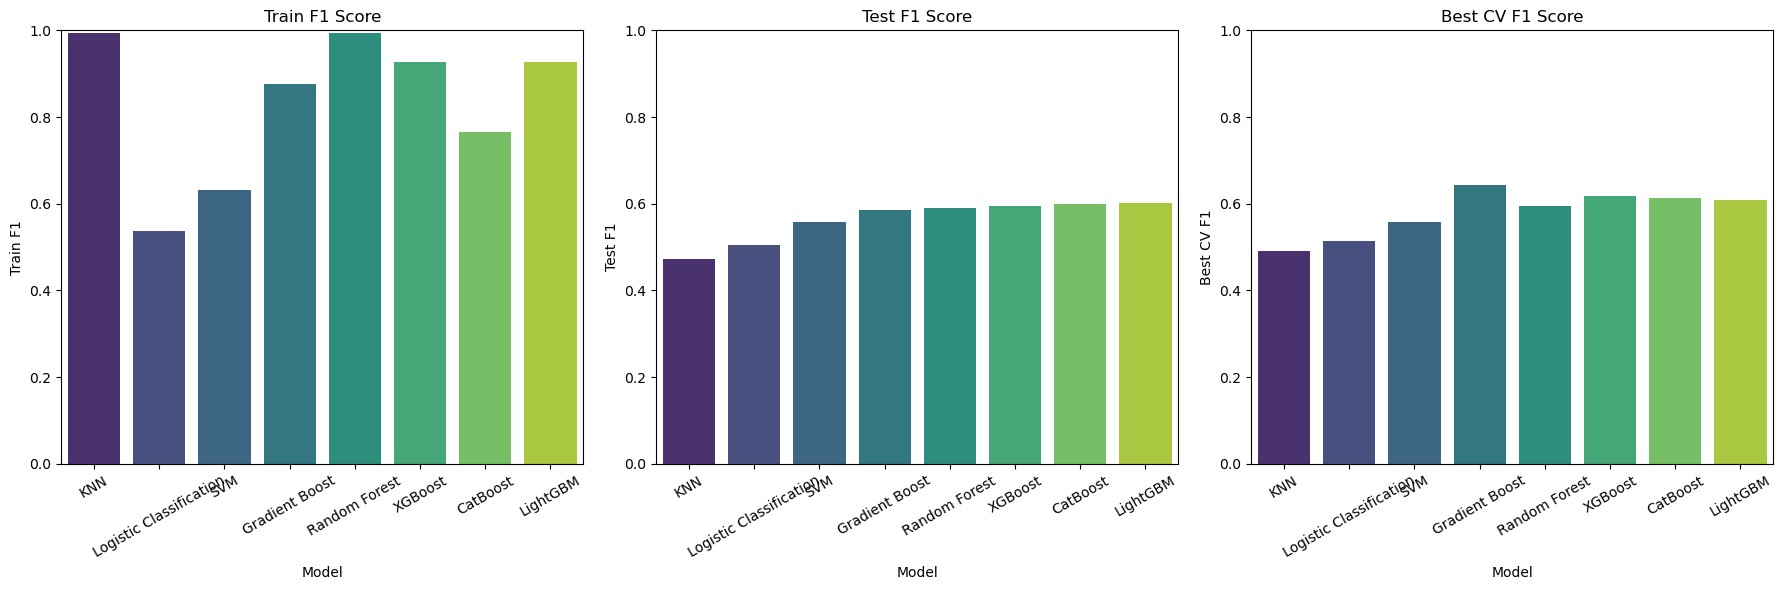

In [119]:
metrics = ['Train F1', 'Test F1', 'Best CV F1']
titles = ['Train F1 Score', 'Test F1 Score', 'Best CV F1 Score']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.barplot(data=grid_df, x='Model', y=metric, hue='Model', palette='viridis', legend=False, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# **Best Model Selection**
It seems Gradient Bossing, XGBoost, and CatBoost are the top 3 models that can be purused further

# **Top Feature Selection**

In [155]:
feature_importances_df = pd.concat([
    gbc_feature_importances.rename('Gradient Boosting'),
    gbc_grid_feature_importances.rename('Gradient Boosting GridSearch'),
    rf_feature_importances.rename('Random Forest'),
    rf_grid_feature_importances.rename('Random Forest GridSearch'),
    xgbc_feature_importances.rename('XGBoost'),
    xgbc_grid_feature_importances.rename('XGBoost GridSearch'),
    cat_feature_importances.rename('CatBoost'),
    cat_grid_feature_importances.rename('CatBoost GridSearch'),
    lgbm_feature_importances.rename('LightGBM'),
    lgbm_grid_feature_importances.rename('LightGBM GridSeach'),
], axis=1).reset_index().rename(columns={'index': 'Feature'})

feature_importances_df.round(3)

,Feature,Gradient Boosting,Gradient Boosting GridSearch,Random Forest,Random Forest GridSearch,XGBoost,XGBoost GridSearch,CatBoost,CatBoost GridSearch,LightGBM,LightGBM GridSeach
0,danceability,0.088,0.080,0.098,0.096,0.083,0.092,0.093,0.089,0.100,0.095
1,energy,0.039,0.037,0.082,0.082,0.056,0.064,0.084,0.078,0.093,0.089
2,key,0.005,0.003,0.034,0.034,0.028,0.029,0.034,0.013,0.035,0.026
3,loudness,0.058,0.063,0.088,0.089,0.063,0.075,0.066,0.060,0.090,0.075
4,mode,0.001,0.000,0.011,0.011,0.027,0.036,0.015,0.006,0.009,0.008
5,speechiness,0.055,0.049,0.076,0.076,0.055,0.062,0.071,0.057,0.088,0.083
6,acousticness,0.042,0.036,0.071,0.070,0.050,0.053,0.058,0.048,0.086,0.080
7,instrumentalness,0.088,0.093,0.093,0.091,0.155,0.127,0.112,0.134,0.080,0.098
8,liveness,0.028,0.021,0.059,0.060,0.039,0.041,0.055,0.027,0.083,0.065
9,valence,0.047,0.034,0.071,0.073,0.055,0.054,0.073,0.056,0.091,0.081


In [140]:
best_models = ['Gradient Boosting GridSearch', 'XGBoost GridSearch', 'CatBoost GridSearch']  # example names
selected_importances = feature_importances_df[['Feature'] + best_models]
selected_importances = selected_importances.sort_values(by='Gradient Boosting GridSearch', ascending=False).reset_index(drop=True)
selected_importances

,Feature,Gradient Boosting GridSearch,XGBoost GridSearch,CatBoost GridSearch
0,tempo,0.420995,0.191088,0.277691
1,duration_ms,0.162935,0.138982,0.154495
2,instrumentalness,0.093185,0.127204,0.133714
3,danceability,0.079823,0.092183,0.088585
4,loudness,0.062615,0.074539,0.059685
5,speechiness,0.048615,0.062304,0.057424
6,energy,0.037264,0.063618,0.078045
7,acousticness,0.036063,0.052612,0.047991
8,valence,0.033544,0.053715,0.055849
9,liveness,0.020724,0.041345,0.027252


In [141]:
top6_features = selected_importances['Feature'].head(6).tolist()


In [142]:
X_train_top6 = X_train[top6_features]
X_test_top6 = X_test[top6_features]

# **Running Best Models Using Top Features**

### **GradientBoosting**

In [143]:
gbc_grid_best_params = gbc_grid.best_params_
gbc_grid_best_params

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}

In [146]:
gbc_opt = GradientBoostingClassifier(**gbc_grid_best_params)
gbc_opt.fit(X_train_top6, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [148]:
f1_score(y_train, gbc_opt.predict(X_train_top6), average = 'macro'), f1_score(y_test, gbc_opt.predict(X_test_top6), average = 'macro')

(0.8286914484748349, 0.5656529933500933)

### **XGBoost**

In [149]:
xgbc_grid_best_params = xgbc_grid.best_params_
xgbc_grid_best_params

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

In [150]:
xgbc_opt = XGBClassifier(**xgbc_grid_best_params)
xgbc_opt.fit(X_train_top6, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [151]:
f1_score(y_train, xgbc_opt.predict(X_train_top6), average = 'macro'), f1_score(y_test, xgbc_opt.predict(X_test_top6), average = 'macro')

(0.8709138556047, 0.5674495434321282)

### **CatBoost**

In [152]:
cat_grid_best_params = cat_grid.best_params_
cat_grid_best_params

{'depth': 4, 'iterations': 300, 'learning_rate': 0.1}

In [156]:
cat_opt = CatBoostClassifier(**cat_grid_best_params, verbose = 0)
cat_opt.fit(X_train_top6, y_train)

In [157]:
f1_score(y_train, cat_opt.predict(X_train_top6), average = 'macro'), f1_score(y_test, cat_opt.predict(X_test_top6), average = 'macro')

(0.7070861253679579, 0.5639220569450515)

Running these models with optimized parameters on selected top 6 features does not seem to have increased f1 score. So it is probably better to run the optimized models on the entire dataset


For deployment we will use the optimized gradient boosintg model


# **Deployment**

In [158]:
best_gbc = gbc_grid.best_estimator_

In [161]:
joblib.dump(best_gbc, 'spotify_best_gradient_boosting_model.pkl')

['spotify_best_gradient_boosting_model.pkl']